In [97]:
import pandas as pd
import pandas.io.data as web
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as scs
%matplotlib inline

In [98]:
def print_statistics(array):
    '''Prints	selected	statistics.
    Parameters
    array:	ndarray
    object	to	generate	statistics	on
    '''

    sta=scs.describe(array)
    print ' %14s %15s ' %(' statistics ' ,' value' )
    print 30* '-'
    print ' %14s %15f ' %('size  ' ,sta[0] )
    print ' %14s %15f ' %('min  ' , sta[1][0])
    print ' %14s %15f ' %(' max ' ,sta[1][1] )
    print ' %14s %15f ' %(' mean ' ,sta[2] )
    print ' %14s %15f ' %('  std' ,np.sqrt(sta[3]) )
    print ' %14s %15f ' %(' skew ' ,sta[4] )
    print ' %14s %15f ' %('  kurtosis' , sta[5])

In [99]:
def normality_tests(arr):
    '''Tests	for	normality	distribution	of	given	data	set.
Parameters
array:	ndarray
object	to	generate	statistics	on
    '''
    print ' Skew of data set %14.3f' %scs.skew(arr)
    print ' Skew test p-value  %14.3f' %scs.skewtest(arr)[1]
    print '  kurt of data set %14.3f' %scs.kurtosis(arr)
    print '  kurt test p-value %14.3f' %scs.kurtosistest(arr)[1]
    print '  Norm test p-values %14.3f' %scs.normaltest(arr)[1]
   

In [83]:
symbols=['^GSPC','XOM','CAT','MSFT']

In [84]:
data=pd.DataFrame()

In [85]:
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo',start='1/1/2015')['Adj Close']
    
data = data.dropna()

In [86]:
data[:5]

,^GSPC,XOM,CAT,MSFT
Date,,,,
2015-01-02,2058.199951,90.533594,89.556707,45.827578
2015-01-05,2020.579956,88.056427,84.829346,45.406156
2015-01-06,2002.609985,87.588298,84.283509,44.739715
2015-01-07,2025.900024,88.475790,85.589622,45.308148
2015-01-08,2062.139893,89.948438,86.466866,46.641029


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2015-01-02 00:00:00 to 2015-10-16 00:00:00
Data columns (total 4 columns):
^GSPC    200 non-null float64
XOM      200 non-null float64
CAT      200 non-null float64
MSFT     200 non-null float64
dtypes: float64(4)

In [88]:
data.tail()

,^GSPC,XOM,CAT,MSFT
Date,,,,
2015-10-12,2017.459961,79.300003,70.500000,47.000000
2015-10-13,2003.689941,79.160004,70.169998,46.889999
2015-10-14,1994.239990,80.160004,70.709999,46.680000
2015-10-15,2023.859985,81.480003,70.830002,47.009998
2015-10-16,2033.109985,82.480003,69.680000,47.509998


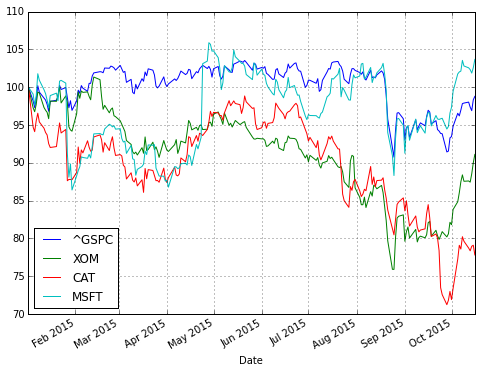

In [89]:
(data / data.ix[0] * 100).plot(figsize=(8, 6))

In [90]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,^GSPC,XOM,CAT,MSFT
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018447,-0.027743,-0.054230,-0.009238
2015-01-06,-0.008933,-0.005330,-0.006455,-0.014786
2015-01-07,0.011563,0.010082,0.015378,0.012625
2015-01-08,0.017730,0.016508,0.010197,0.028994


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x132BB590>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14D84E30>]], dtype=object)

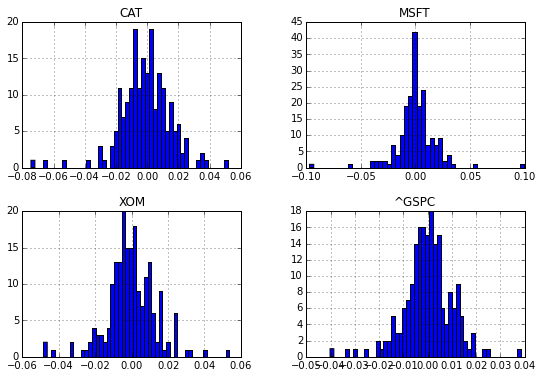

In [91]:
log_returns.hist(bins=50, figsize=(9, 6))

In [93]:
log_returns.describe()

,^GSPC,XOM,CAT,MSFT
count,199.000000,199.000000,199.000000,199.000000
mean,-0.000062,-0.000468,-0.001261,0.000181
std,0.009898,0.013425,0.015949,0.017575
min,-0.040211,-0.048430,-0.074546,-0.097099
25%,-0.004613,-0.007090,-0.010306,-0.007069
50%,-0.000305,-0.001224,-0.001242,-0.000225
75%,0.005162,0.007226,0.007998,0.007447
max,0.038291,0.053692,0.051613,0.099413


In [100]:
for sym in symbols:
    print ' \n Results for symbols %s' %sym
    print 30*'-'
    log_data=np.array(log_returns[sym].dropna())
    print_statistics(log_data)

 
 Results for symbols ^GSPC
------------------------------
    statistics            value 
------------------------------
         size        199.000000 
          min         -0.040211 
           max         0.038291 
          mean        -0.000062 
            std        0.009898 
          skew        -0.293375 
       kurtosis        2.384886 
 
 Results for symbols XOM
------------------------------
    statistics            value 
------------------------------
         size        199.000000 
          min         -0.048430 
           max         0.053692 
          mean        -0.000468 
            std        0.013425 
          skew        -0.071703 
       kurtosis        2.534060 
 
 Results for symbols CAT
------------------------------
    statistics            value 
------------------------------
         size        199.000000 
          min         -0.074546 
           max         0.051613 
          mean        -0.001261 
            std        0.015949 
     

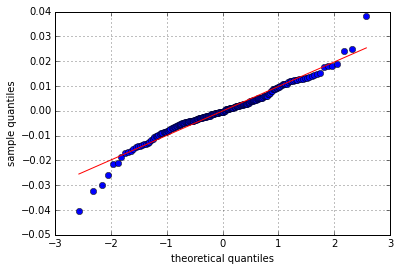

In [94]:
sm.qqplot(log_returns['^GSPC'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

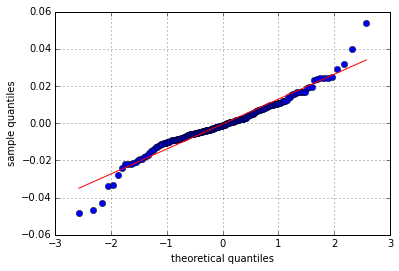

In [96]:
sm.qqplot(log_returns['XOM'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [ ]:
def normality_tests(arr):
”’ Tests for normality distribution of given data set.
Parameters
==========
array: ndarray
object to generate statistics on
”’
print “Skew of data set %14.3f” % scs.skew(arr)
print “Skew test p-value %14.3f”% scs.skewtest(arr)[1]
print “Kurt of data set %14.3f” % scs.kurtosis(arr)
print “Kurt test p-value %14.3f”% scs.kurtosistest(arr)[1]

In [101]:
for sym in symbols:
    print ' \nResults for symbol %s' %sym
    print 32*'-'
    log_data=np.array(log_returns[sym].dropna())
    normality_tests(log_data)

 
Results for symbol ^GSPC
--------------------------------
 Skew of data set         -0.293
 Skew test p-value           0.086
  kurt of data set          2.385
  kurt test p-value          0.000
  Norm test p-values          0.000
 
Results for symbol XOM
--------------------------------
 Skew of data set         -0.072
 Skew test p-value           0.670
  kurt of data set          2.534
  kurt test p-value          0.000
  Norm test p-values          0.000
 
Results for symbol CAT
--------------------------------
 Skew of data set         -0.584
 Skew test p-value           0.001
  kurt of data set          3.318
  kurt test p-value          0.000
  Norm test p-values          0.000
 
Results for symbol MSFT
--------------------------------
 Skew of data set         -0.075
 Skew test p-value           0.653
  kurt of data set          9.279
  kurt test p-value          0.000
  Norm test p-values          0.000


In [102]:
Exxon_Mobil_CorporationXOM= web.DataReader('XOM',data_source='google',start='1/1/2000',end='10/9/2015')

In [103]:
Exxon_Mobil_CorporationXOM.head()

,Open,High,Low,Close,Volume
﻿Date,,,,,
2000-01-03,39.75,40.38,38.94,39.09,13455800
2000-01-04,38.69,39.09,38.25,38.41,14392000
2000-01-05,39.00,40.88,38.91,40.50,17485000
2000-01-06,40.31,42.91,40.09,42.59,19462000
2000-01-07,42.97,43.12,42.31,42.31,16514600


In [104]:
Exxon_Mobil_CorporationXOM.tail()

,Open,High,Low,Close,Volume
﻿Date,,,,,
2015-10-05,76.65,77.15,75.79,76.81,18486731
2015-10-06,76.96,78.56,76.26,77.89,18757917
2015-10-07,78.97,79.29,77.53,79.20,18703210
2015-10-08,79.31,80.11,78.54,80.03,14344692
2015-10-09,80.05,80.16,78.62,79.26,17384670


In [105]:
Exxon_Mobil_CorporationXOM['Log_Ret']=np.log(Exxon_Mobil_CorporationXOM['Close']/
    Exxon_Mobil_CorporationXOM['Close'].shift(1))

In [106]:
Exxon_Mobil_CorporationXOM['Volatility']=pd.rolling_std(Exxon_Mobil_CorporationXOM['Log_Ret'],
                                                        window=252)*np.sqrt(252)

In [107]:
Exxon_Mobil_CorporationXOM['Volatility']=pd.rolling_std(Exxon_Mobil_CorporationXOM['Log_Ret'],
                                                        window=252)*np.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x15204A50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x15222590>], dtype=object)

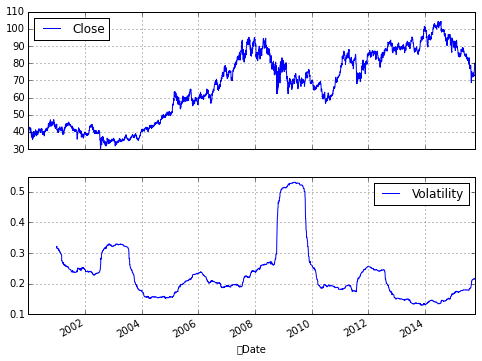

In [108]:
Exxon_Mobil_CorporationXOM[['Close','Volatility']].plot(subplots=True,color='blue', figsize=(8,6))

In [109]:
Exxon_Mobil_CorporationXOM['Log_Ret'].head()

﻿Date
2000-01-03         NaN
2000-01-04   -0.017549
2000-01-05    0.052984
2000-01-06    0.050318
2000-01-07   -0.006596
Name: Log_Ret, dtype: float64

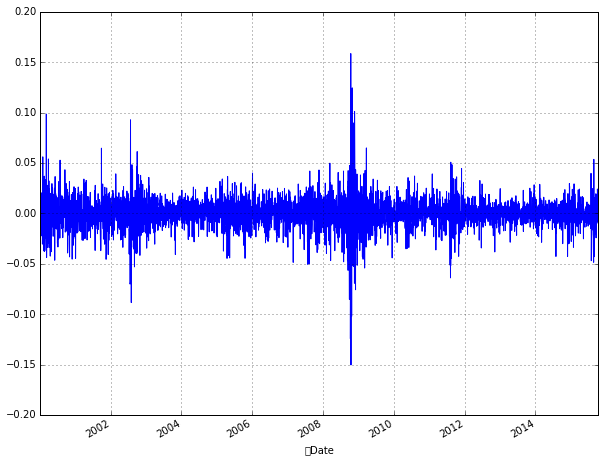

In [110]:
Exxon_Mobil_CorporationXOM['Log_Ret'].plot(figsize=(10,8))

In [111]:
sp500=web.DataReader('^GSPC',data_source='yahoo',start='1/1/2000')

In [112]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3973 entries, 2000-01-03 00:00:00 to 2015-10-16 00:00:00
Data columns (total 6 columns):
Open         3973 non-null float64
High         3973 non-null float64
Low          3973 non-null float64
Close        3973 non-null float64
Volume       3973 non-null int64
Adj Close    3973 non-null float64
dtypes: float64(5), int64(1)

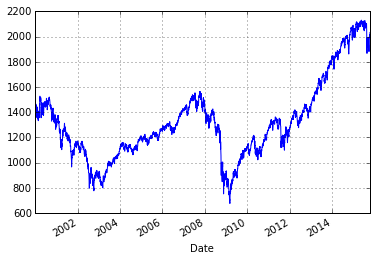

In [113]:
sp500['Close'].plot()

In [114]:
sp500['42d']=np.round(pd.rolling_mean(sp500['Close'],window=42),2)
sp500['252d']=np.round(pd.rolling_mean(sp500['Close'],window=252),2)

In [115]:
sp500[['Close','42d','252d',]].tail()

,Close,42d,252d
Date,,,
2015-10-12,2017.459961,1972.07,2051.43
2015-10-13,2003.689941,1970.17,2051.94
2015-10-14,1994.239990,1967.85,2052.40
2015-10-15,2023.859985,1965.98,2053.04
2015-10-16,2033.109985,1964.46,2053.72


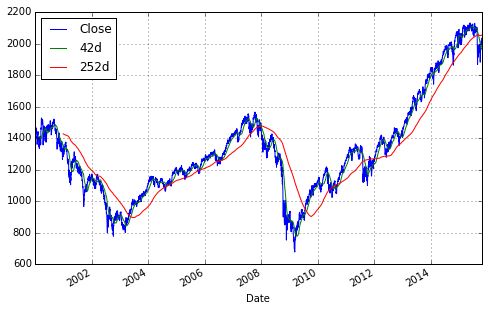

In [116]:
sp500[['Close','42d','252d',]].plot(grid=True,figsize=(8,5))

In [117]:
sp500['42-252'] = sp500['42d'] - sp500['252d']
sp500['42-252'].tail()

Date
2015-10-12   -79.36
2015-10-13   -81.77
2015-10-14   -84.55
2015-10-15   -87.06
2015-10-16   -89.26
Name: 42-252, dtype: float64

In [118]:
sp500['42-252'] = sp500['42d'] - sp500['252d']
sp500['42-252'].head()

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
Name: 42-252, dtype: float64

In [119]:
SD=50
sp500['Regime']=np.where(sp500['42-252']>SD,1,0)
sp500['Regime']=np.where(sp500['42-252']<SD,-1,sp500['Regime'])
sp500['Regime'].value_counts()

-1    1909
 1    1813
 0     251
dtype: int64

(-1.1, 1.1)

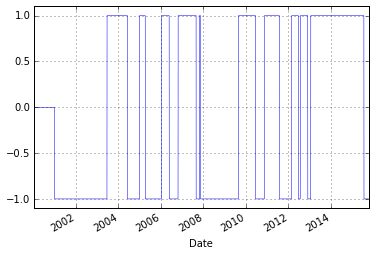

In [120]:
sp500['Regime'].plot(lw=0.5)
plt.ylim(-1.1,1.1)

In [121]:
sp500['Market']=np.log(sp500['Close'] / sp500['Close'].shift(1))

In [122]:
sp500['Strategy']=sp500['Regime'].shift(1)*sp500['Market']

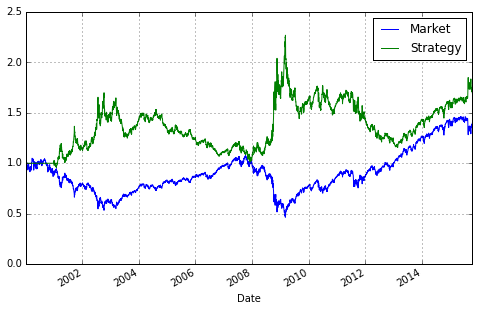

In [123]:
sp500[['Market','Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(8,5))

In [124]:
DAX=web.DataReader(name='^GDAXI',data_source='yahoo',start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4025 entries, 2000-01-03 00:00:00 to 2015-10-16 00:00:00
Data columns (total 6 columns):
Open         4025 non-null float64
High         4025 non-null float64
Low          4025 non-null float64
Close        4025 non-null float64
Volume       4025 non-null int64
Adj Close    4025 non-null float64
dtypes: float64(5), int64(1)

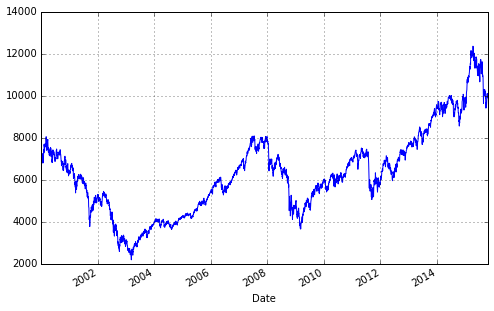

In [125]:
DAX['Close'].plot(figsize=(8,5))

In [126]:
%%time
DAX['Ret_Loop']=0.0
for i in range(1,len(DAX)):
    DAX['Ret_Loop'][i]=np.log(DAX['Close'][i]/(DAX['Close'])[i-1])

Wall time: 596 ms


In [127]:
DAX[['Close','Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2015-10-12,10119.830078,0.002298
2015-10-13,10032.820312,-0.008635
2015-10-14,9915.849609,-0.011727
2015-10-15,10064.799805,0.014910
2015-10-16,10104.429688,0.003930


In [128]:
%time 
DAX['Return']=np.log(DAX['Close']/DAX['Close'].shift(1))

Wall time: 0 ns


In [129]:
DAX[['Close','Ret_Loop','Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2015-10-12,10119.830078,0.002298,0.002298
2015-10-13,10032.820312,-0.008635,-0.008635
2015-10-14,9915.849609,-0.011727,-0.011727
2015-10-15,10064.799805,0.014910,0.014910
2015-10-16,10104.429688,0.003930,0.003930


array([<matplotlib.axes._subplots.AxesSubplot object at 0x15B5CF50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x16C40AD0>], dtype=object)

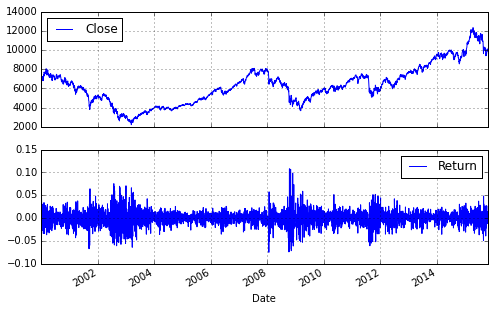

In [130]:
DAX[['Close','Return']].plot(subplots=True,style='b',figsize=(8,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x16E5A590>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x16F06830>], dtype=object)

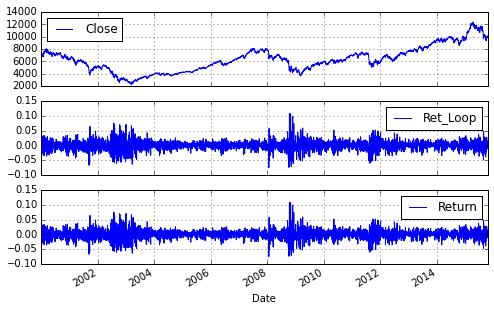

In [131]:
DAX[['Close','Ret_Loop','Return']].plot(subplots=True,style='b',figsize=(8,5))

In [132]:
DAX['42d'] = pd.rolling_mean(DAX['Close'], window=42)
DAX['252d'] = pd.rolling_mean(DAX['Close'], window=252)

In [133]:
DAX[['Close','42d','252d']].tail()

,Close,42d,252d
Date,,,
2015-10-12,10119.830078,10063.320057,10686.968029
2015-10-13,10032.820312,10040.645787,10691.810849
2015-10-14,9915.849609,10016.253395,10696.138784
2015-10-15,10064.799805,9995.988630,10702.062791
2015-10-16,10104.429688,9982.233375,10708.100605


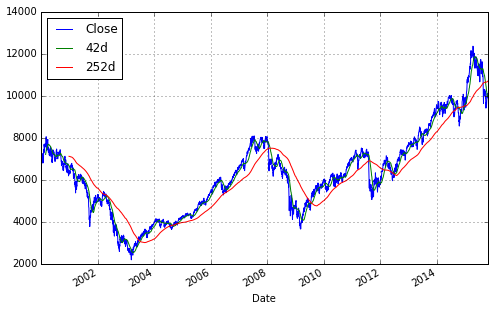

In [134]:
DAX[['Close','42d','252d']].plot(figsize=(8,5))

In [135]:
import math
DAX['Mov_Vol']=pd.rolling_std(DAX['Return'],window=252)*math.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x175576B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1764F610>], dtype=object)

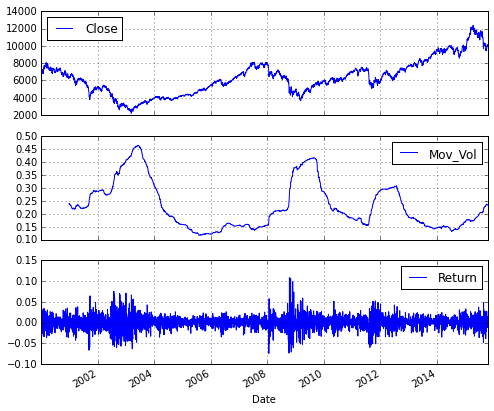

In [136]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7))

In [138]:
from IPython.display import Math
Math(r'N(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x} e^{-\frac{z^2}{2}}\, dz')

<IPython.core.display.Math object>